## Intro to Data Analysis using Pandas DataFrames

### Titanic Passengers Dataset

In [1]:
# Make sure to pip install seaborn

%pylab inline
import seaborn as sns
import pandas as pd

path = '/class/itpmssd/datasets/titanic.csv'
titanic = pd.read_csv(path)

Populating the interactive namespace from numpy and matplotlib


In [2]:
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henry    male   35      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
titanic.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

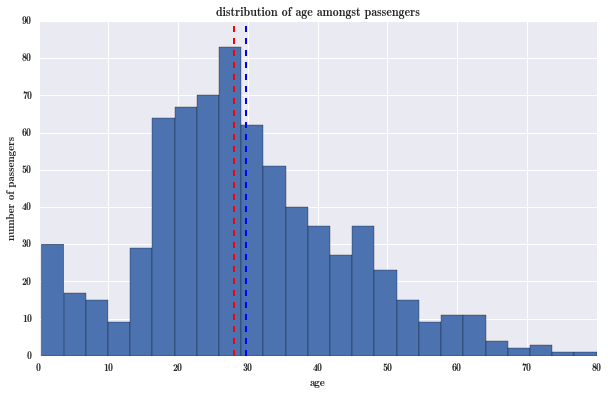

In [9]:
titanic.Age.hist(bins=25, figsize=(10,6))
xlabel('age')
ylabel('number of passengers')
title('distribution of age amongst passengers')
axvline(titanic.Age.mean(), color='b', linestyle='dashed', linewidth=2)
axvline(titanic.Age.median(), color='r', linestyle='dashed', linewidth=2)

### Group by: split-apply-combine

By "group by" we are referring to a process involving one or more of the following steps:

- Split: the data into groups based on some criteria
- Apply: a function to each group independently
- Combine: the results into a new data structure

In the case of our dataset, we'd like to group our data by day+hour and display the number of reported incidents over time, using hourly bins. What we'll need to do in order to make this happen:

- Split the data by its index (the dt column)
- Count the number of items in each group (number of incidents reported each day)
- And bring this information back together into a new Data Frame

In [13]:
# Now let's group by Sex, and then see the differences in age
# --> we split the dataset by Sex, applied a function (count), and combined the different groups back into the result
grouped = titanic.groupby('Sex')
grouped.Age.median()

Sex
female    27
male      29
Name: Age, dtype: float64

In [14]:
grouped.Age.describe()

Sex          
female  count    261.000000
        mean      27.915709
        std       14.110146
        min        0.750000
        25%       18.000000
        50%       27.000000
        75%       37.000000
        max       63.000000
male    count    453.000000
        mean      30.726645
        std       14.678201
        min        0.420000
        25%       21.000000
        50%       29.000000
        75%       39.000000
        max       80.000000
dtype: float64

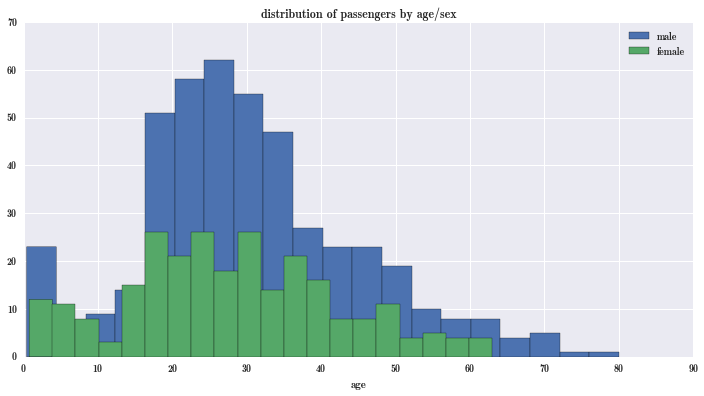

In [16]:
grouped.get_group('male').Age.hist(bins=20, figsize=(12,6), label="male")
grouped.get_group('female').Age.hist(bins=20, label="female")
legend()
title("distribution of passengers by age/sex")
xlabel("age")

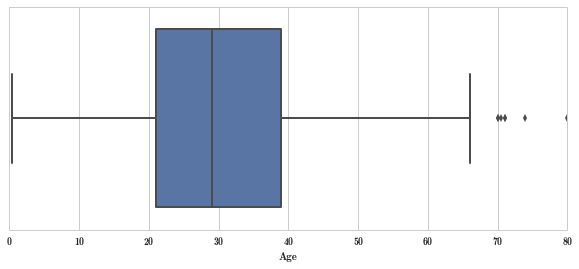

In [19]:
sns.set_style("whitegrid")
sns.boxplot(grouped.Age.get_group('male'), linewidth=2)
figsize(10,4)


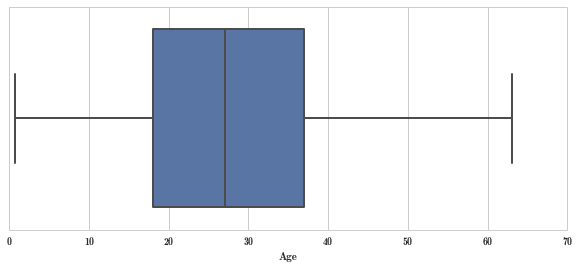

In [18]:
sns.boxplot(grouped.Age.get_group('female'), linewidth=2)

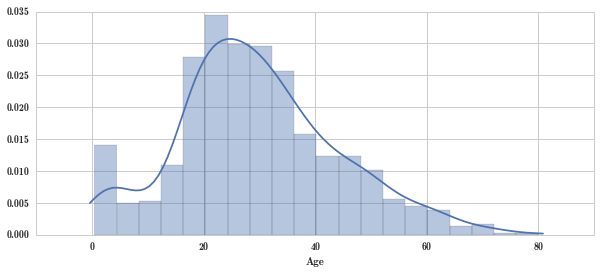

In [20]:
# Age: distribution plot - histogram + kde

sns.distplot(titanic.Age.dropna())

In [21]:
corr_titanic = titanic.corr()
corr_titanic

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000

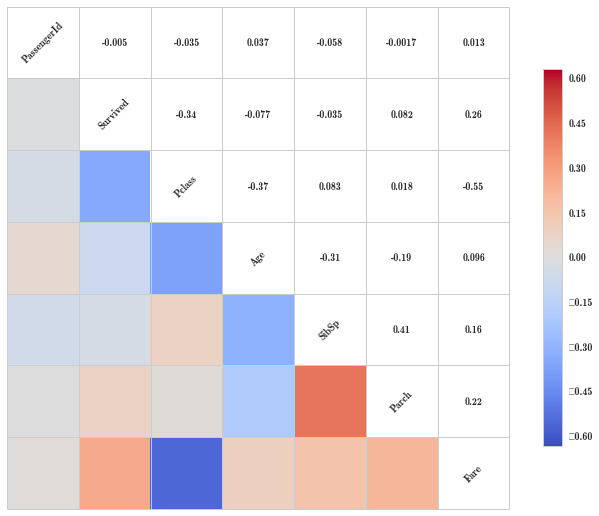

In [23]:
# Set up the matplotlib figure size
plt.subplots(figsize=(12, 9))
sns.corrplot(titanic)

### Related Read

- Kaggle competition (Titanic Dataset)
http://nbviewer.ipython.org/github/agconti/kaggle-titanic/blob/master/Titanic.ipynb

- Seaborn Plotting Library (w/some great examples)
http://stanford.edu/~mwaskom/software/seaborn/